# Exploring the Data


In [ ]:
%load_ext autoreload
%autoreload 2

## Set the working directory (Google Colab)

In [ ]:
import os
os.chdir('/content/drive/MyDrive/projects/credit-risk-modelling-udemy/notebooks/')

In [ ]:
!pip install -e ../.

Obtaining file:///content/drive/MyDrive/projects/credit-risk-modelling-udemy
  Running setup.py develop for src


## Import the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from src.project.config import PROJECT_DIR

## Import the data

* 800,000 consumer loan data issued from 2007 to 2015 by Lending Club: US peer-to-peer lending company.
* [Kaggle Dataset Link](https://www.kaggle.com/wendykan/lending-club-loan-data/version/1)
* The dataset is divided into parts:
    * 2007-2014: We will use this period to develop the Expected Loss models
    * 2015: Test our models on future applications (i.e. 2015)

In [ ]:
from src.project.utils import load_data

In [ ]:
loan_data = load_data()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


## Explore the data

In [ ]:
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
loan_data = loan_data.drop('Unnamed: 0', axis=1).reset_index()

### Duplication in id columns

In [ ]:
loan_data[['index', 'id', 'member_id']].apply(lambda col: col.duplicated().mean())

index        0.0
id           0.0
member_id    0.0
dtype: float64

No duplicates :)

Data types

In [ ]:
from IPython.display import display

In [ ]:
with pd.option_context('display.max_rows', None):
    display(loan_data.dtypes)

index                            int64
id                               int64
member_id                        int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
pymnt_plan                      object
url                             object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                      

Basic Info

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   index                        466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

### Remove those with high missing percentage 



In [ ]:
loan_data_miss_prop = loan_data.isna().mean()
with pd.option_context('display.max_rows', None):
    display(loan_data_miss_prop)

index                          0.000000
id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      0.059166
emp_length                     0.045054
home_ownership                 0.000000
annual_inc                     0.000009
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                           0.729815
purpose                        0.000000
title                          0.000043
zip_code                       0.000000
addr_state                     0.000000


In [ ]:
def remove_high_miss_columns(df, thresh):
    miss_df = df.isna().mean()
    low_miss_cols = miss_df[(miss_df < thresh)].index
    return df[low_miss_cols]

In [ ]:
low_miss_cols = (loan_data_miss_prop[loan_data_miss_prop != 1]).index
loan_data = loan_data[low_miss_cols]

In [ ]:
loan_data.shape

(466285, 58)

Summary

In [ ]:
loan_data.describe()

,index,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,466256.000000,3.960090e+05,3.960090e+05,3.960090e+05
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,0.004002,1.919135e+02,1.388017e+05,3.037909e+04
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,0.068637,1.463021e+04,1.521147e+05,3.724713e+04
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,0.000000,0.000000e+00,2.861800e+04,1.350000e+04
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,0.000000,0.000000e+00,8.153900e+04,2.280000e+04
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,0.000000,0.000000e+00,2.089530e+05,3.790000e+04
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,33.000000,188.000000,129.000000,84.000000,63.000000,2.568995e+06,892.300000,156.000000,32160.380000,32160.380000,57777.579870,57777.580000,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,36234.440000,20.000000,188.000000,1.0,5.000000,9.152545e+06,8.000078e+06,9.999999e+06


## Plot by Column types

In [ ]:
numeric_cols = loan_data.select_dtypes(include=[np.number]).columns
str_cols = loan_data.select_dtypes(include='object').columns

In [ ]:
from src.utils import remove_extra_whitespace

loan_data[str_cols] = loan_data[str_cols].applymap(remove_extra_whitespace)

In [ ]:
def get_string_numeric_stats(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    str_cols = df.select_dtypes(include='object').columns

    str_stats = df[str_cols].apply(lambda col: tuple(col.sort_values().unique()))
    numeric_stats = df[numeric_cols].apply(lambda col: [col.min(), col.max()])
    numeric_stats = numeric_stats.T.apply(tuple, axis=1)

    return str_stats, numeric_stats

In [ ]:
str_stats, numeric_stats = get_string_numeric_stats(loan_data.drop(['index', 'id', 'member_id'], axis=1))
str_cols, numeric_cols = str_stats.index, numeric_stats.index

## String Columns

In [ ]:
with pd.option_context('display.max_colwidth', None):
    display(str_stats.drop(['url', 'desc', 'emp_title', 'title']).apply(lambda val: val[:20]))

term                                                                                                                                                                                                         (36 months, 60 months)
grade                                                                                                                                                                                                         (A, B, C, D, E, F, G)
sub_grade                                                                                                                                          (A1, A2, A3, A4, A5, B1, B2, B3, B4, B5, C1, C2, C3, C4, C5, D1, D2, D3, D4, D5)
emp_length                                                                                                               (1 year, 10+ years, 2 years, 3 years, 4 years, 5 years, 6 years, 7 years, 8 years, 9 years, < 1 year, nan)
home_ownership                                                                          

In [ ]:
num_unique = str_stats.apply(len)
num_unique

term                        2
grade                       7
sub_grade                  35
emp_title              200749
emp_length                 12
home_ownership              6
verification_status         3
issue_d                    91
loan_status                 9
pymnt_plan                  2
url                    466285
desc                   124415
purpose                    14
title                   61261
zip_code                  888
addr_state                 50
earliest_cr_line          665
initial_list_status         2
last_pymnt_d               99
next_pymnt_d              101
last_credit_pull_d        104
application_type            1
dtype: int64

### Plot barplot of those with num_unique <= 20

In [ ]:
cols_unique_small = num_unique[num_unique <= 20].index
len(cols_unique_small)

10

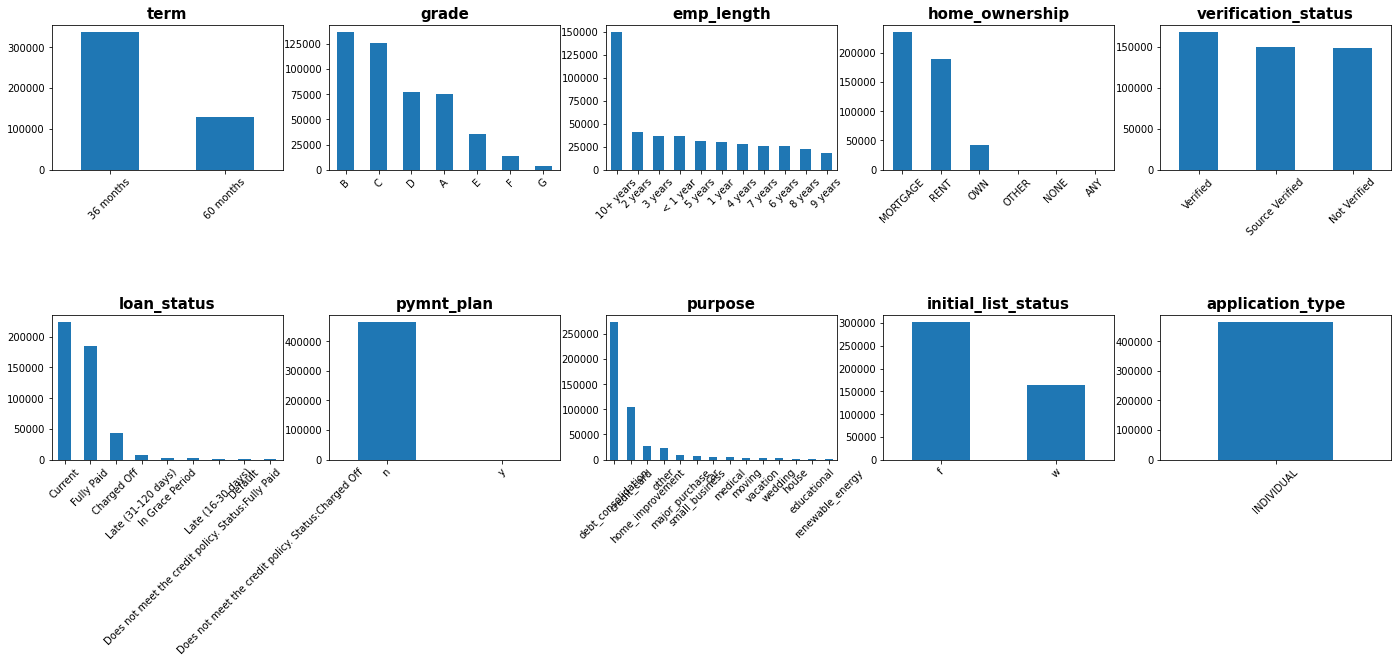

In [ ]:
fig, axn = plt.subplots(2, 5, figsize=(24, 8))

fig.subplots_adjust(hspace=1)

i = 0
for row in axn:
    for ax in row:
        col = cols_unique_small[i]
        loan_data[col].value_counts().plot(kind='bar', ax=ax)
        ax.set_title(col, fontdict=dict(weight='bold', size=15))
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        i += 1


In [ ]:
out_file = os.path.join(PROJECT_DIR, 'reports/categorical_barplot_2007_2014.jpg')
plt.tight_layout()
fig.savefig(out_file)

<Figure size 432x288 with 0 Axes>

* loan_staus: we will convert this column into the dependant variable representing the loan default status (binary):
    * For PD model (Probability of Default), we will take 0 as default (or bad loan), and 1 as non-default (or good loan). As in credit scorecards, a higher value must represent goodness of the application, hence when modelling with Logistic Regression, higher the coefficients, the more positive effect of it on the application.
* term: there are two terms of loan offered by the bank
* grade: This is the external FICO credit rating. This should show a positive association with a good loan (i.e. non-default)
    * grade = A: High chance of a good loan
    * grade = F: High chance of default
* emp_length: This should encoded as an ordinal variable
* home_ownership: Must be a very important predictor of default
    * Mostly MORTGAGE, then RENT, then OWN house
* verification status: verified profiles must be better loan takers
* pymnt_plan: 
* purpose: This will be a very important predictor:
    * mostly people take for debt consolidation: taking a single loan to pay off multiple debts. Must be associated with a high chance of default?
    * Not many people take loan for education.. hmmm.
* initial_list_status: 
* application_type: This seems to have only one unique value and hence can be ignored. 
    * All loans are taken by individuals


Removing `application_type`

In [ ]:
loan_data.drop(['application_type'], axis=1, inplace=True)

## Cols with num_unique > 25 (analyze separately)

* We will need to combine the categories in such columns so as to develop a more interpretable credit scorecard
    * Using techniques like fine-classing, coarse-classing with the help of methods like weight of evidence, Information Value wrt the dependant variable (default or not)


### with num_unique <= 100

In [ ]:
num_unique_med = num_unique.loc[np.logical_and(num_unique > 25, num_unique <= 100)]
num_unique_med

sub_grade       35
issue_d         91
addr_state      50
last_pymnt_d    99
dtype: int64

In [ ]:
cols_unique_med = num_unique_med.index

In [ ]:
# fig, axn = plt.subplots(4, 1, figsize=(80, 64), dpi=100)

# i = 0
# for ax in axn:
#     col = cols_unique_med[i]
#     loan_data[col].value_counts(normalize=True).plot(kind='bar', ax=ax)
#     ax.set_title(col, fontdict=dict(weight='bold', size=20))

#     i += 1


### sub_grade

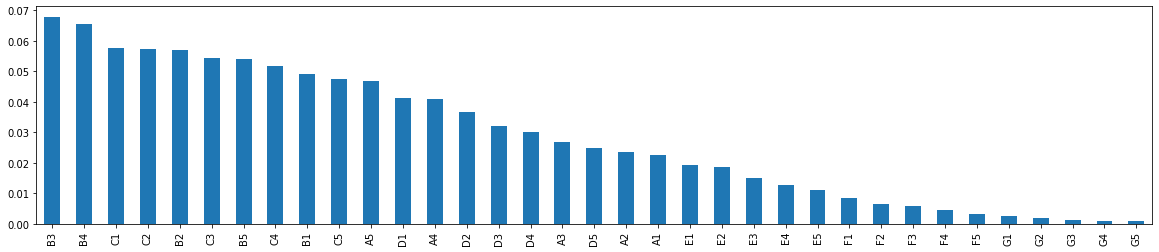

In [ ]:
loan_data['sub_grade'].value_counts(normalize=True).plot(kind='bar', figsize=(20, 4))

* A subcategory of the FICO credit rating. 

### addr_state

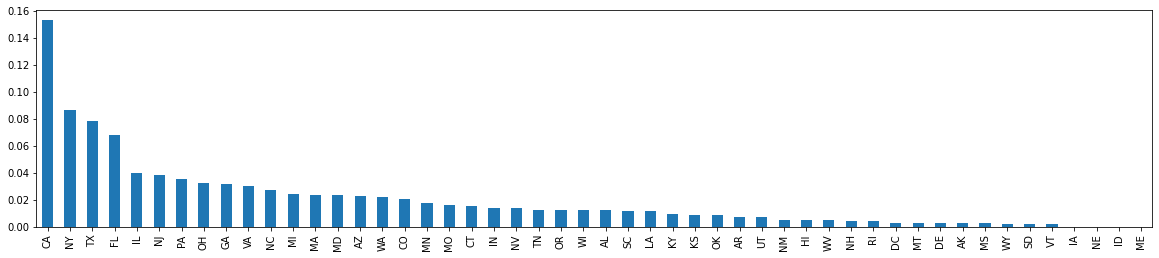

In [ ]:
loan_data['addr_state'].value_counts(normalize=True).plot(kind='bar', figsize=(20, 4))

### issue_d

In [ ]:
loan_data['issue_d']

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 466285, dtype: object

In [ ]:
issue_date = pd.to_datetime(loan_data['issue_d'], format='%b-%y', errors='coerce')
issue_date

0        2011-12-01
1        2011-12-01
2        2011-12-01
3        2011-12-01
4        2011-12-01
            ...    
466280   2014-01-01
466281   2014-01-01
466282   2014-01-01
466283   2014-01-01
466284   2014-01-01
Name: issue_d, Length: 466285, dtype: datetime64[ns]

In [ ]:
def get_date_range(ser):
    ser = pd.to_datetime(ser)
    return ser.agg(['min', 'max'])

In [ ]:
get_date_range(issue_date)

min   2007-06-01
max   2014-12-01
Name: issue_d, dtype: datetime64[ns]

Where the issue_date is NaN

In [ ]:
loan_data.loc[issue_date.isna(), 'issue_d']

Series([], Name: issue_d, dtype: object)

In [ ]:
loan_data['issue_d'] = issue_date

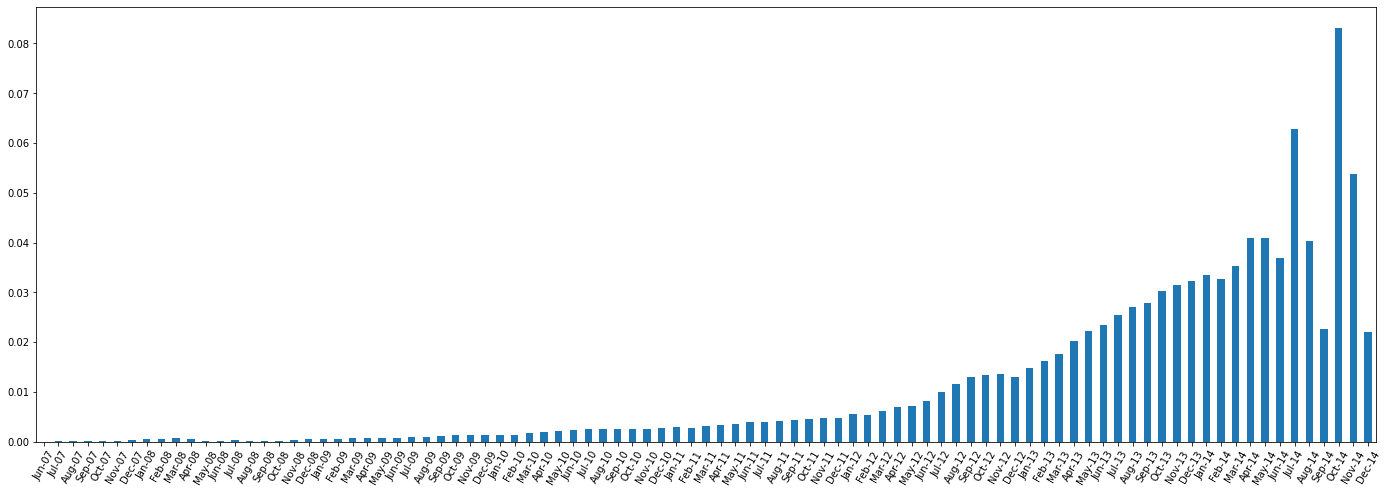

In [ ]:
ax = loan_data['issue_d'].value_counts(normalize=True).sort_index().plot(kind='bar', figsize=(24, 8))
xticklabels = [label.get_text() for label in ax.get_xticklabels()]
xticklabels = pd.to_datetime(xticklabels).strftime('%b-%y')
ax.set_xticklabels(xticklabels, rotation=60);

* Loan applications have been increasing year by year

### last_pymnt_d

In [ ]:
last_payment_date = pd.to_datetime(loan_data['last_pymnt_d'], format='%b-%y', errors='coerce')
last_payment_date

0        2015-01-01
1        2013-04-01
2        2014-06-01
3        2015-01-01
4        2016-01-01
            ...    
466280   2016-01-01
466281   2014-12-01
466282   2016-01-01
466283   2014-12-01
466284   2016-01-01
Name: last_pymnt_d, Length: 466285, dtype: datetime64[ns]

In [ ]:
get_date_range(last_payment_date)

min   2007-12-01
max   2016-01-01
Name: last_pymnt_d, dtype: datetime64[ns]

Where the conversion led to NaN

In [ ]:
loan_data.loc[last_payment_date.isna(), 'last_pymnt_d'].isna().mean()

1.0

* They were already NaN, so we can be sure (almost) that our conversion was fine

In [ ]:
loan_data['last_pymnt_d'] = last_payment_date

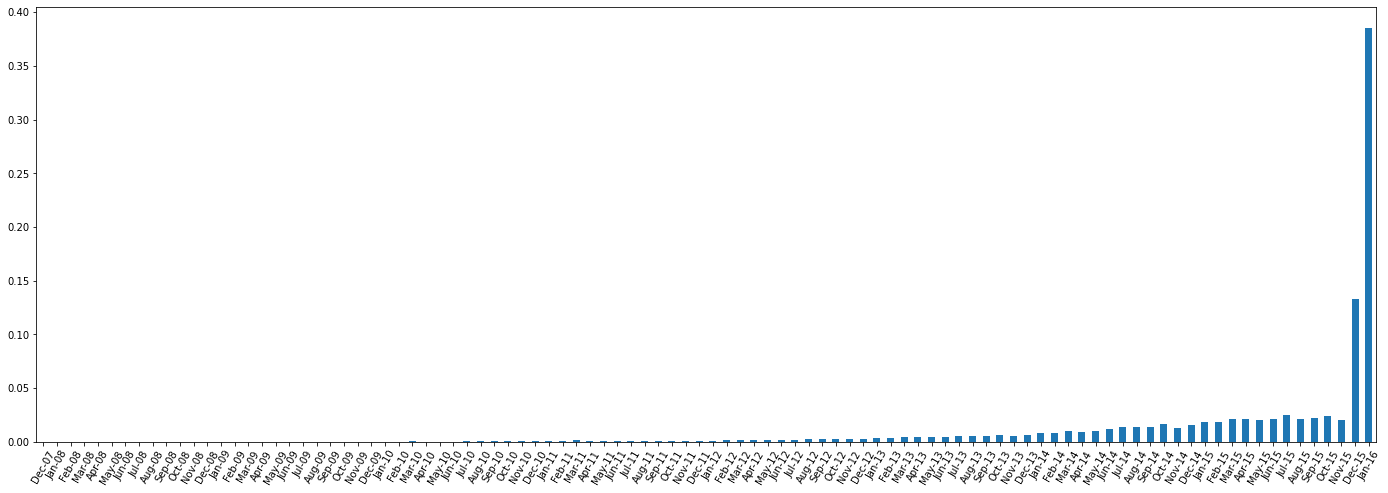

In [ ]:
ax = loan_data['last_pymnt_d'].value_counts(normalize=True).sort_index().plot(kind='bar', figsize=(24, 8))
xticklabels = [label.get_text() for label in ax.get_xticklabels()]
xticklabels = pd.to_datetime(xticklabels).strftime('%b-%y')
ax.set_xticklabels(xticklabels, rotation=60);

## with num_unique > 100

In [ ]:
num_unique_large = num_unique.loc[num_unique > 100]
num_unique_large

emp_title             200749
url                   466285
desc                  124415
title                  61261
zip_code                 888
earliest_cr_line         665
next_pymnt_d             101
last_credit_pull_d       104
dtype: int64

### earliest_cr_line

In [ ]:
earliest_cr_line = pd.to_datetime(loan_data['earliest_cr_line'], format='%b-%y', errors='coerce')
earliest_cr_line

0        1985-01-01
1        1999-04-01
2        2001-11-01
3        1996-02-01
4        1996-01-01
            ...    
466280   2003-04-01
466281   1997-06-01
466282   2001-12-01
466283   2003-02-01
466284   2000-02-01
Name: earliest_cr_line, Length: 466285, dtype: datetime64[ns]

In [ ]:
get_date_range(earliest_cr_line)

min   1969-01-01
max   2068-12-01
Name: earliest_cr_line, dtype: datetime64[ns]

* Seems to be a problem with the parsing of dates leading to dates way in the future. 
* Let's assume the data was first analyzed in December 2017, so dates ahead of this date must be wrongly parsed

In [ ]:
def show_data_on_cond(cond, *ser_or_df):
    data_df = pd.concat(ser_or_df, axis=1)

    return data_df[cond]

In [ ]:
date_of_analyses = pd.to_datetime('2017-12-01', format='%Y-%m-%d')
is_future_date = earliest_cr_line > date_of_analyses
show_data_on_cond(is_future_date, loan_data['earliest_cr_line'], earliest_cr_line)

,earliest_cr_line,earliest_cr_line
1580,Sep-62,2062-09-01
1770,Sep-68,2068-09-01
2799,Sep-64,2064-09-01
3282,Sep-67,2067-09-01
3359,Feb-65,2065-02-01
...,...,...
464003,Jan-68,2068-01-01
464260,Jul-66,2066-07-01
465100,Oct-67,2067-10-01
465500,Sep-67,2067-09-01


such dates were parsed 100 years ahead. We just need to subtract 100 years from such dates or add explicit year string to such dates and re-parse

In [ ]:
from dateutil.relativedelta import relativedelta
earliest_cr_line[is_future_date] = earliest_cr_line[is_future_date].apply(lambda d: d - relativedelta(years=100))

Where the conversion led to NaNs

In [ ]:
loan_data.loc[earliest_cr_line.isna(), 'earliest_cr_line'].isna().mean()

1.0

In [ ]:
loan_data['earliest_cr_line'] = earliest_cr_line

### next_payment_d

In [ ]:
loan_data['next_pymnt_d']

0            NaN
1            NaN
2            NaN
3            NaN
4         Feb-16
           ...  
466280    Feb-16
466281       NaN
466282    Feb-16
466283       NaN
466284    Feb-16
Name: next_pymnt_d, Length: 466285, dtype: object

In [ ]:
next_payment_d = pd.to_datetime(loan_data['next_pymnt_d'], format='%b-%y', errors='coerce')
next_payment_d

0               NaT
1               NaT
2               NaT
3               NaT
4        2016-02-01
            ...    
466280   2016-02-01
466281          NaT
466282   2016-02-01
466283          NaT
466284   2016-02-01
Name: next_pymnt_d, Length: 466285, dtype: datetime64[ns]

In [ ]:
get_date_range(next_payment_d)

min   2007-12-01
max   2016-03-01
Name: next_pymnt_d, dtype: datetime64[ns]

Where the conversion led to NaNs

In [ ]:
loan_data.loc[next_payment_d.isna(), 'next_pymnt_d'].isna().mean()

1.0

In [ ]:
loan_data['next_pymnt_d'] = next_payment_d

### last_credit_pull_d

In [ ]:
loan_data['last_credit_pull_d']

0         Jan-16
1         Sep-13
2         Jan-16
3         Jan-15
4         Jan-16
           ...  
466280    Jan-16
466281    Jan-16
466282    Dec-15
466283    Apr-15
466284    Jan-16
Name: last_credit_pull_d, Length: 466285, dtype: object

In [ ]:
last_credit_pull_d = pd.to_datetime(loan_data['last_credit_pull_d'], format='%b-%y', errors='coerce')
last_credit_pull_d

0        2016-01-01
1        2013-09-01
2        2016-01-01
3        2015-01-01
4        2016-01-01
            ...    
466280   2016-01-01
466281   2016-01-01
466282   2015-12-01
466283   2015-04-01
466284   2016-01-01
Name: last_credit_pull_d, Length: 466285, dtype: datetime64[ns]

In [ ]:
get_date_range(last_credit_pull_d)

min   2007-05-01
max   2016-01-01
Name: last_credit_pull_d, dtype: datetime64[ns]

Where the conversion led to NaNs

In [ ]:
loan_data.loc[last_credit_pull_d.isna(), 'last_credit_pull_d'].isna().mean()

1.0

In [ ]:
loan_data['last_credit_pull_d'] = last_credit_pull_d

## Numeric Columns

In [ ]:
numeric_stats

loan_amnt                         (500.0, 35000.0)
funded_amnt                       (500.0, 35000.0)
funded_amnt_inv                     (0.0, 35000.0)
int_rate                             (5.42, 26.06)
installment                       (15.67, 1409.99)
annual_inc                     (1896.0, 7500000.0)
dti                                   (0.0, 39.99)
delinq_2yrs                            (0.0, 29.0)
inq_last_6mths                         (0.0, 33.0)
mths_since_last_delinq                (0.0, 188.0)
mths_since_last_record                (0.0, 129.0)
open_acc                               (0.0, 84.0)
pub_rec                                (0.0, 63.0)
revol_bal                         (0.0, 2568995.0)
revol_util                            (0.0, 892.3)
total_acc                             (1.0, 156.0)
out_prncp                          (0.0, 32160.38)
out_prncp_inv                      (0.0, 32160.38)
total_pymnt                     (0.0, 57777.57987)
total_pymnt_inv                

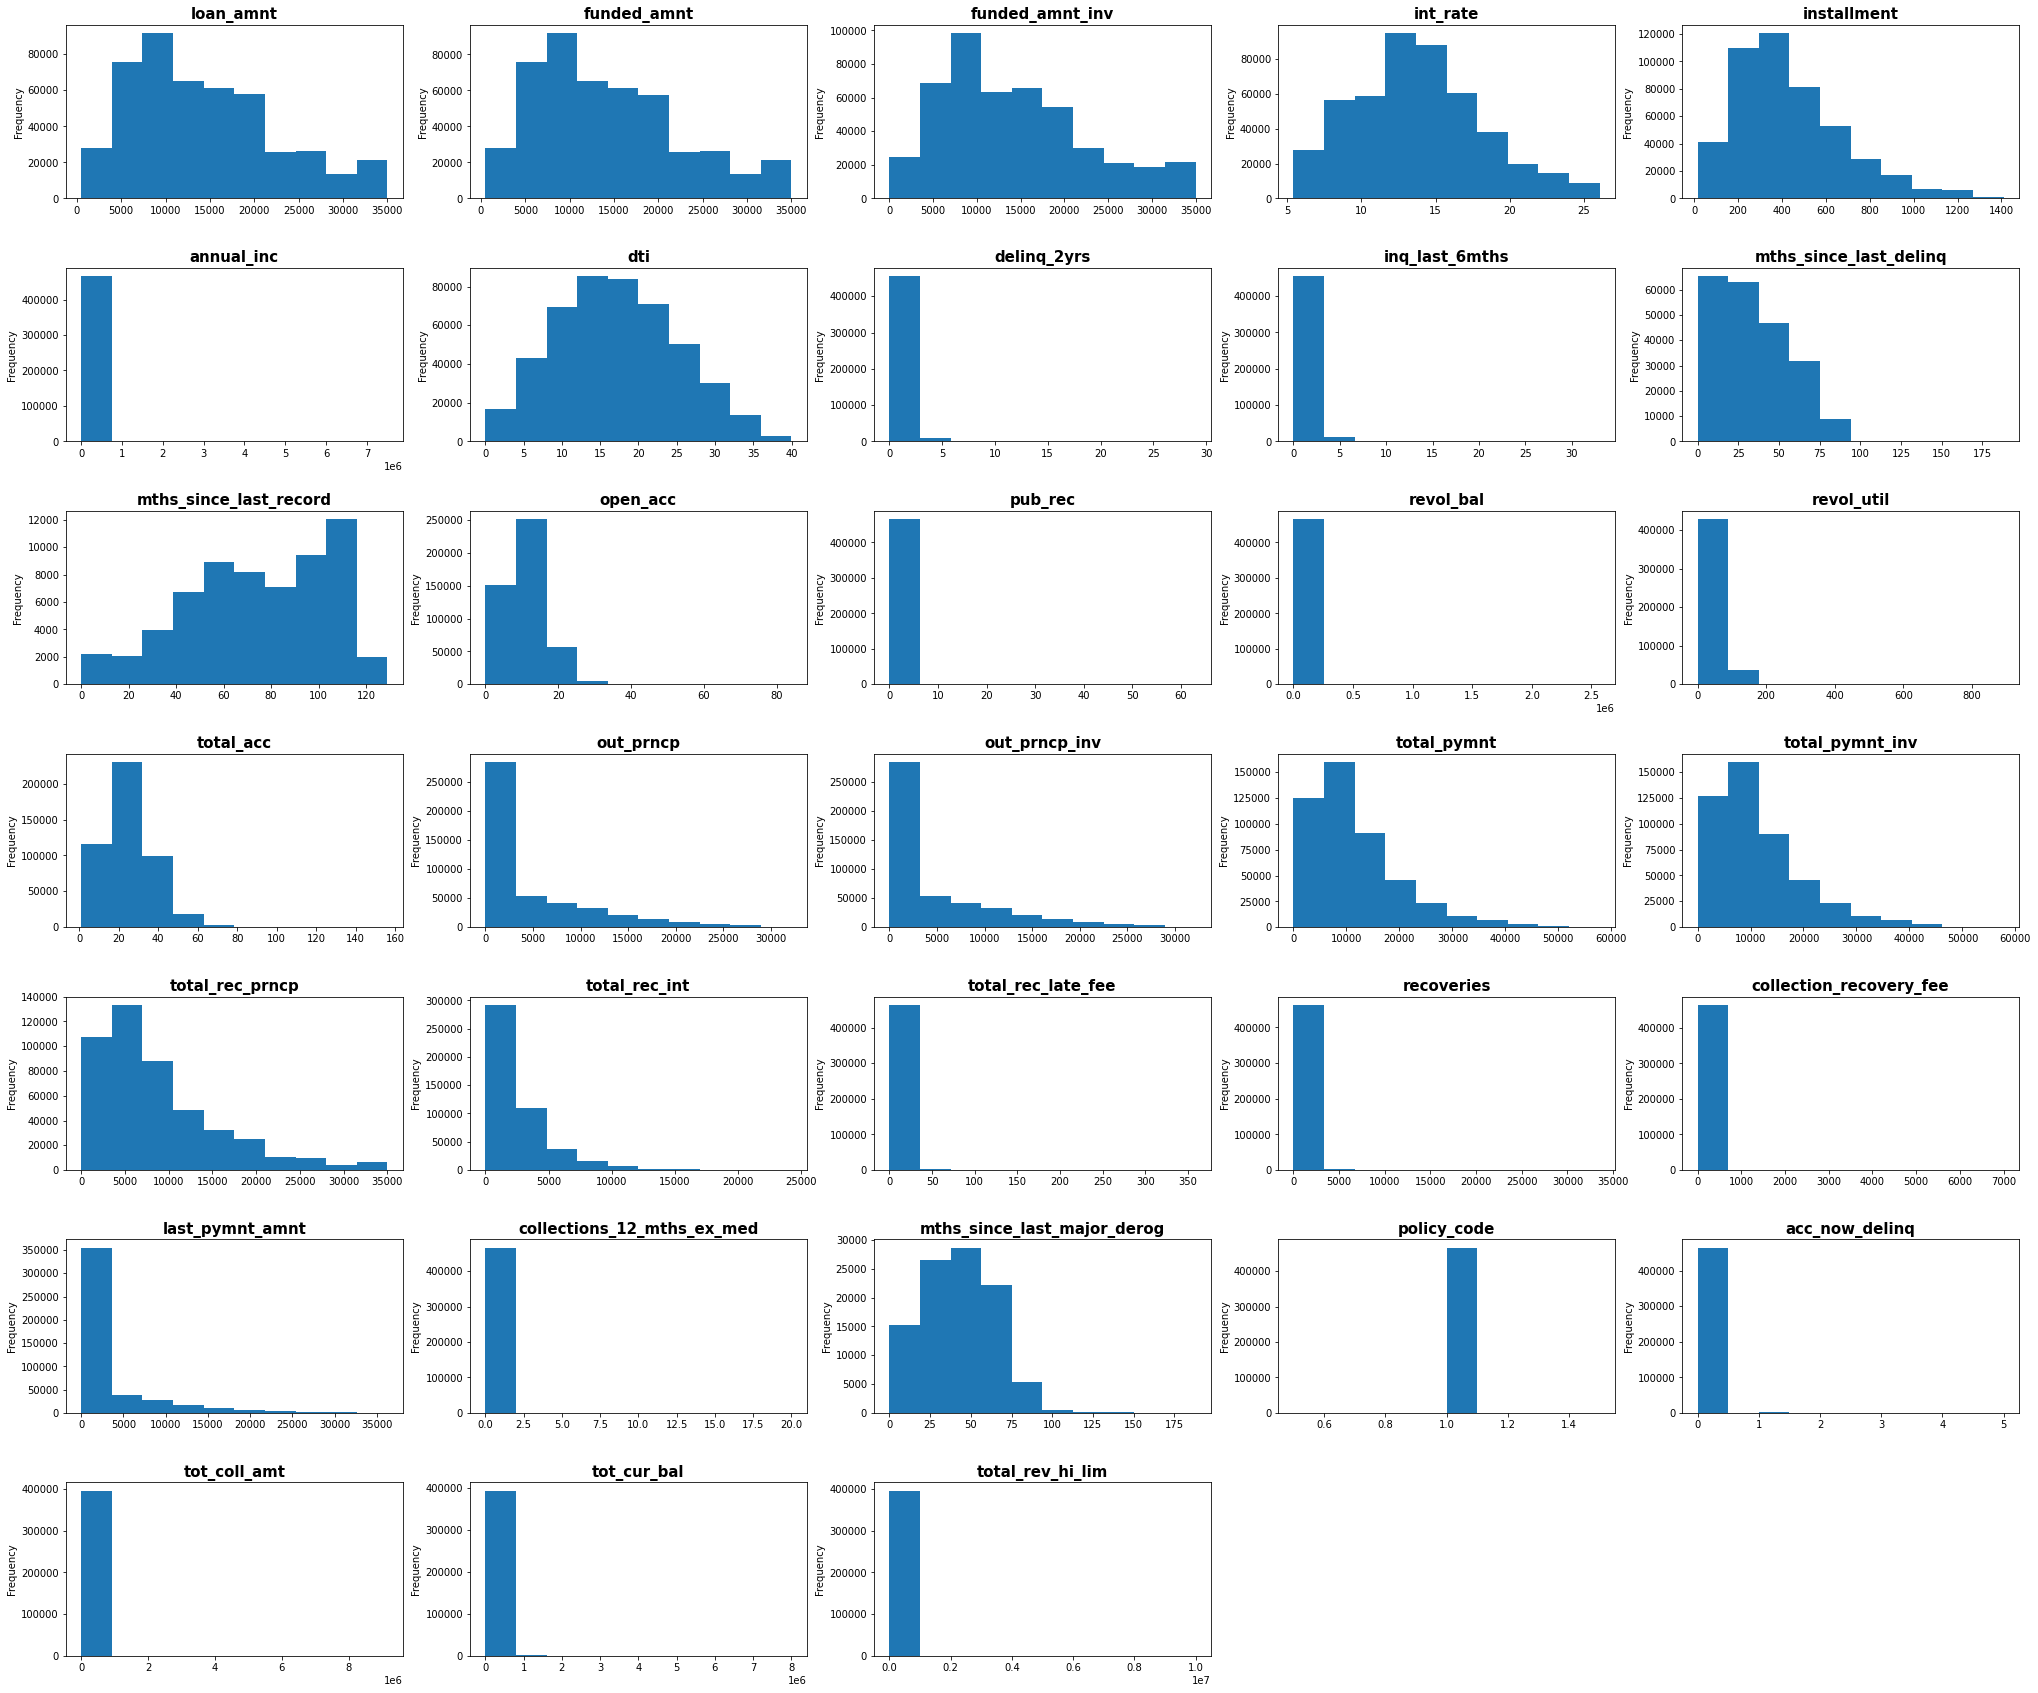

In [ ]:
fig, axn = plt.subplots(7, 5, figsize=(35, 30))

i = 0
for row in axn:
    for ax in row:
        try:
            col = numeric_cols[i]
        except IndexError:
            break
        
        loan_data[col].plot(kind='hist', ax=ax)
        ax.set_title(col, fontdict=dict(weight='bold', size=15))

        i += 1

for ax in axn[-1][-2:]:
    ax.set_axis_off()

plt.subplots_adjust(hspace=0.4)

In [ ]:
out_file = os.path.join(PROJECT_DIR, 'reports/numeric_histogram_2007_2014.jpg')
plt.tight_layout()
fig.savefig(out_file)

<Figure size 432x288 with 0 Axes>

## Write out cleaned dataframe

In [ ]:
out_file = os.path.join(PROJECT_DIR, 'data/loan_data_2007_2014_cleaned.csv')
loan_data.to_csv(out_file, index=False)